In [60]:
import requests
import numpy as np
import json
import pandas as pd
from sklearn.manifold import TSNE

import matplotlib
import matplotlib.pyplot as plt

In [50]:
def get_emb(word):
    headers = {
        "Content-Type": "application/json",
        "Authorization": f"Bearer {OPENAI_API_KEY}"
    }
    data = {
        "input": word,
        "model": "text-embedding-ada-002"
    }
    response = requests.post("https://api.openai.com/v1/embeddings", json=data, headers=headers)
    return np.array(response.json()["data"][0]["embedding"])

def get_distance(word1, word2):
    emb1 = get_word_embedding(word1)
    emb2 = get_word_embedding(word2)
    # cosine similarity - OpenAI embeddings are normalized to length 1, so we don't need to divide by the norms
    similarity = np.dot(emb1, emb2) # / (np.linalg.norm(emb1) * np.linalg.norm(emb2))
    return similarity

# def euclidean_dist(emb1, emb2):
#     distance = np.linalg.norm(emb1 - emb2)
#     return distance


In [62]:
OPENAI_API_KEY = input("API key: ")

In [69]:
len(get_word_embedding("dog"))

1536

game

In [93]:
turns = 1
embeddings = []
words = []
players = []

while True:
    player1_word = input("Player 1, enter your word: ").strip()
    player2_word = input("Player 2, enter your word: ").strip()

    embeddings.append(get_emb(player1_word))
    words.append(player1_word)
    players.append('Player 1')
    embeddings.append(get_emb(player2_word))
    words.append(player2_word)
    players.append('Player 2')

    if player1_word == player2_word:
        print(f"Congratulations! You both chose {player1_word} in {turns} turn(s).")
        break

    distance = get_distance(player1_word, player2_word)
    print(distance)
    turns += 1

0.8835987449285004
0.8203760456801715
0.7905390815239466
0.7079648906316218
Congratulations! You both chose cow in 5 turn(s).


In [94]:
df = pd.DataFrame({'emb': embeddings, 'word': words, 'player': players})
df

,emb,word,player
0,"[-0.005693642, -0.016467137, -0.017972782, -0....",cow,Player 1
1,"[-0.003346655, -0.017767696, -0.015915204, -0....",dog,Player 2
2,"[0.0061339703, -0.025041917, -0.017068438, -0....",frog,Player 1
3,"[0.0054049254, -0.0073929443, 0.005777679, -0....",blue,Player 2
4,"[-0.018480027, -0.03374155, 0.0015177431, -0.0...",y,Player 1
5,"[-0.0025390773, -0.003259429, 0.01918342, -0.0...",beauty,Player 2
6,"[0.0015720829, -0.01673626, -0.0009687884, 0.0...",,Player 1
7,"[-0.0180039, -0.018670712, 0.0035653983, -0.01...",expression,Player 2
8,"[-0.0055895085, -0.0163516, -0.01803286, -0.01...",cow,Player 1
9,"[-0.0055895085, -0.0163516, -0.01803286, -0.01...",cow,Player 2


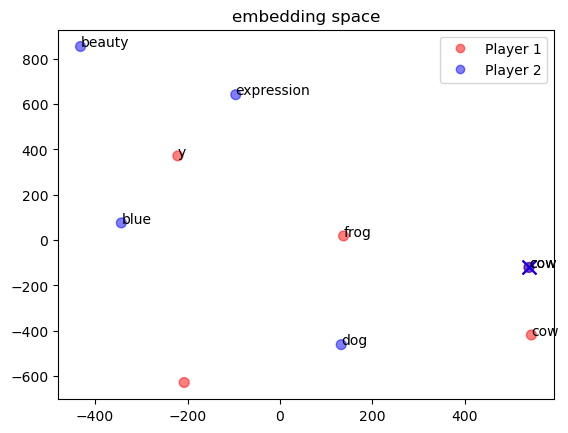

In [95]:
# Visualization
mat = np.array(df.emb.to_list())
perplexity = min(5, turns - 1)
vis = TSNE(n_components=2, perplexity=perplexity, random_state=42).fit_transform(mat)

colors = ["red", "blue"]
x, y = vis[:, 0], vis[:, 1]
color_indices = df.player.map({'Player 1': 0, 'Player 2': 1}).values

# add word labels
for i, txt in enumerate(df.word):
    plt.annotate(txt, (x[i], y[i]))

plt.scatter(x, y, c=color_indices, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5, s=50)

# Mark the ending point
plt.scatter(x[-2], y[-2], marker='x', color=colors[0], s=100)
plt.scatter(x[-1], y[-1], marker='x', color=colors[1], s=100)

# add legend to the plot
plt.legend(handles=scatter.legend_elements()[0], labels=['Player 1', 'Player 2'])

plt.title("embedding space")  # t-SNE
plt.show()

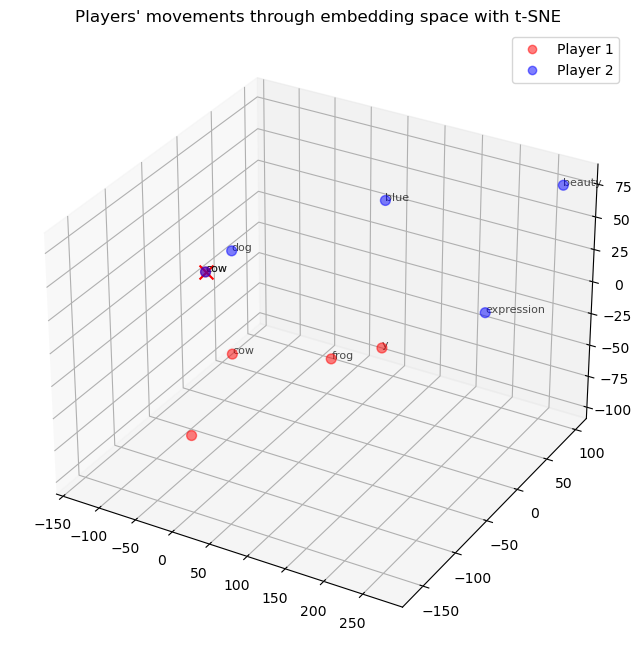

In [97]:
from mpl_toolkits.mplot3d import Axes3D

# Visualization with 3D t-SNE
mat = np.array(df.emb.to_list())
vis = TSNE(n_components=3, perplexity=min(5, turns - 1), random_state=42).fit_transform(mat)

colors = ["red", "blue"]
color_indices = df.player.map({'Player 1': 0, 'Player 2': 1}).values

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(vis[:, 0], vis[:, 1], vis[:, 2], c=color_indices, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5, s=50)

# Add word labels
for i, word in enumerate(df.word):
    ax.text(vis[i, 0], vis[i, 1], vis[i, 2], word, size=8, alpha=0.7)
    
# Mark the winning point
ax.scatter(vis[-2, 0], vis[-2, 1], vis[-2, 2], marker='x', color=colors[0], s=100)

# Enhance appearance
ax.set_title("Players' movements through embedding space with t-SNE")
plt.legend(handles=scatter.legend_elements()[0], labels=['Player 1', 'Player 2'])
plt.show()